In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from math import sqrt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
%matplotlib inline

In [2]:
train_df = pd.read_csv('./train/train.csv')
test_df = pd.read_csv('./test/test.csv')
original_train_df = train_df.copy()
original_test_df = test_df.copy()

In [3]:
train_df.shape, test_df.shape

((341424, 24), (146765, 23))

In [4]:
train_df.dtypes

reservation_id                         object
booking_date                           object
checkin_date                           object
checkout_date                          object
channel_code                            int64
main_product_code                       int64
numberofadults                          int64
numberofchildren                        int64
persontravellingid                      int64
resort_region_code                      int64
resort_type_code                        int64
room_type_booked_code                   int64
roomnights                              int64
season_holidayed_code                 float64
state_code_residence                  float64
state_code_resort                       int64
total_pax                               int64
member_age_buckets                     object
booking_type_code                       int64
memberid                               object
cluster_code                           object
reservationstatusid_code          

In [5]:
train_df.isnull().sum(), test_df.isnull().sum()

(reservation_id                           0
 booking_date                             0
 checkin_date                             0
 checkout_date                            0
 channel_code                             0
 main_product_code                        0
 numberofadults                           0
 numberofchildren                         0
 persontravellingid                       0
 resort_region_code                       0
 resort_type_code                         0
 room_type_booked_code                    0
 roomnights                               0
 season_holidayed_code                  114
 state_code_residence                  4764
 state_code_resort                        0
 total_pax                                0
 member_age_buckets                       0
 booking_type_code                        0
 memberid                                 0
 cluster_code                             0
 reservationstatusid_code                 0
 resort_id                      

In [6]:
train_df['season_holidayed_code'].fillna(0.0, inplace=True)
train_df['state_code_residence'].fillna(0.0, inplace=True)

test_df['season_holidayed_code'].fillna(0.0, inplace=True)
test_df['state_code_residence'].fillna(0.0, inplace=True)

In [7]:
train_df['cluster_code'].unique(), train_df['reservationstatusid_code'].unique(), train_df['resort_id'].unique(), train_df['member_age_buckets'].unique()

(array(['F', 'E', 'D', 'B', 'A', 'C'], dtype=object),
 array(['C', 'A', 'B', 'D'], dtype=object),
 array(['4e07408562bedb8b60ce05c1decfe3ad16b72230967de01f640b7e4729b49fce',
        '39fa9ec190eee7b6f4dff1100d6343e10918d044c75eac8f9e9a2596173f80c9',
        '535fa30d7e25dd8a49f1536779734ec8286108d115da5045d77f3b4185d8f790',
        'd4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f90da3a666eec13ab35',
        'b17ef6d19c7a5b1ee83b907c595526dcb1eb06db8227d650d5dda0a9f4ce8cd9',
        'ff5a1ae012afa5d4c889c50ad427aaf545d31a4fac04ffc1c4d03d403ba4250a',
        '0b918943df0962bc7a1824c0555a389347b4febdc7cf9d1254406d80ce44e3f9',
        'a68b412c4282555f15546cf6e1fc42893b7e07f271557ceb021821098dd66c1b',
        '7f2253d7e228b22a08bda1f09c516f6fead81df6536eb02fa991a34bb38d9be8',
        '4ec9599fc203d176a301536c2e091a19bc852759b255bd6818810a42c5fed14a',
        '49d180ecf56132819571bf39d9b7b342522a2ac6d23c1418d3338251bfe469c8',
        'e7f6c011776e8db7cd330b54174fd76f7d0216b612387a5ffcfb81e6f

In [8]:
test_df['cluster_code'].unique(), test_df['reservationstatusid_code'].unique(), test_df['resort_id'].unique(), test_df['member_age_buckets'].unique()

(array(['A', 'F', 'D', 'E', 'C', 'B'], dtype=object),
 array(['C', 'A', 'B'], dtype=object),
 array(['9f14025af0065b30e47e23ebb3b491d39ae8ed17d33739e5ff3827ffb3634953',
        'e7f6c011776e8db7cd330b54174fd76f7d0216b612387a5ffcfb81e6f0919683',
        'd4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f90da3a666eec13ab35',
        '49d180ecf56132819571bf39d9b7b342522a2ac6d23c1418d3338251bfe469c8',
        'e29c9c180c6279b0b02abd6a1801c7c04082cf486ec027aa13515e4f3884bb6b',
        'b17ef6d19c7a5b1ee83b907c595526dcb1eb06db8227d650d5dda0a9f4ce8cd9',
        'c75cb66ae28d8ebc6eded002c28a8ba0d06d3a78c6b5cbf9b2ade051f0775ac4',
        '535fa30d7e25dd8a49f1536779734ec8286108d115da5045d77f3b4185d8f790',
        '3fdba35f04dc8c462986c992bcf875546257113072a909c162f7e470e581e278',
        '7f2253d7e228b22a08bda1f09c516f6fead81df6536eb02fa991a34bb38d9be8',
        '9400f1b21cb527d7fa3d3eabba93557a18ebe7a2ca4e471cfe5e4c5b4ca7f767',
        'ff5a1ae012afa5d4c889c50ad427aaf545d31a4fac04ffc1c4d03d403ba425

In [9]:
# A as 1, B as 2, C as 3, D as 4, E as 5 & F as 6 FOR CLUSTER_CODE
train_df['cluster_code'] = train_df['cluster_code'].replace(('A','B','C','D','E','F'),(1,2,3,4,5,6))
test_df['cluster_code'] = test_df['cluster_code'].replace(('A','B','C','D','E','F'),(1,2,3,4,5,6))

# A as 1, B as 2, C as 3 & D as 4 FOR RESERVATION STATUS ID CODE
train_df['reservationstatusid_code'] = train_df['reservationstatusid_code'].replace(('A','B','C','D'),(1,2,3,4))
test_df['reservationstatusid_code'] = test_df['reservationstatusid_code'].replace(('A','B','C'),(1,2,3))

# A as 1, B as 2, C as 3, D as 4, E as 5, F as 6, G as 7, H as 8, I as 9 & J as 10 FOR MEMBER_AGE_BUCKET
train_df['member_age_buckets'] = train_df['member_age_buckets'].replace(('A','B','C','D','E','F','G','H','I','J'),(1,2,3,4,5,6,7,8,9,10))
test_df['member_age_buckets'] = test_df['member_age_buckets'].replace(('A','B','C','D','E','F','G','H','I','J'),(1,2,3,4,5,6,7,8,9,10))

In [10]:
train_df['booking_date'] = pd.to_datetime(train_df['booking_date'], format='%d/%m/%y')
train_df['checkin_date'] = pd.to_datetime(train_df['checkin_date'], format='%d/%m/%y')
train_df['checkout_date'] = pd.to_datetime(train_df['checkout_date'], format='%d/%m/%y')

test_df['booking_date'] = pd.to_datetime(test_df['booking_date'], format='%d/%m/%y')
test_df['checkin_date'] = pd.to_datetime(test_df['checkin_date'], format='%d/%m/%y')
test_df['checkout_date'] = pd.to_datetime(test_df['checkout_date'], format='%d/%m/%y')

In [11]:
for i in (train_df, test_df):
    i['b_year'] = i['booking_date'].dt.year
    i['b_month'] = i['booking_date'].dt.month
    i['c_in_year'] = i['checkin_date'].dt.year
    i['c_in_month'] = i['checkin_date'].dt.month
    i['c_out_year'] = i['checkout_date'].dt.year
    i['c_out_month'] = i['checkout_date'].dt.month

In [12]:
train_df.columns

Index(['reservation_id', 'booking_date', 'checkin_date', 'checkout_date',
       'channel_code', 'main_product_code', 'numberofadults',
       'numberofchildren', 'persontravellingid', 'resort_region_code',
       'resort_type_code', 'room_type_booked_code', 'roomnights',
       'season_holidayed_code', 'state_code_residence', 'state_code_resort',
       'total_pax', 'member_age_buckets', 'booking_type_code', 'memberid',
       'cluster_code', 'reservationstatusid_code', 'resort_id',
       'amount_spent_per_room_night_scaled', 'b_year', 'b_month', 'c_in_year',
       'c_in_month', 'c_out_year', 'c_out_month'],
      dtype='object')

### resort_id label encoder

In [13]:
from sklearn.preprocessing import LabelEncoder
gle = LabelEncoder()

gle.fit(train_df['resort_id'])
train_df['resort_id'] = gle.transform(train_df['resort_id'])
test_df['resort_id'] = gle.transform(test_df['resort_id'])

In [14]:
train_df.columns

Index(['reservation_id', 'booking_date', 'checkin_date', 'checkout_date',
       'channel_code', 'main_product_code', 'numberofadults',
       'numberofchildren', 'persontravellingid', 'resort_region_code',
       'resort_type_code', 'room_type_booked_code', 'roomnights',
       'season_holidayed_code', 'state_code_residence', 'state_code_resort',
       'total_pax', 'member_age_buckets', 'booking_type_code', 'memberid',
       'cluster_code', 'reservationstatusid_code', 'resort_id',
       'amount_spent_per_room_night_scaled', 'b_year', 'b_month', 'c_in_year',
       'c_in_month', 'c_out_year', 'c_out_month'],
      dtype='object')

In [15]:
train_df.head(), test_df.head()

(                                      reservation_id booking_date  \
 0  07659f3758d8aee27f5a7e2887adeacb67021cb95ada1b...   2018-04-05   
 1  03930f033646d073462b35d411616323597715ac4fc398...   2015-01-23   
 2  d145a32920e6587ad95bfe299d80c0affa268220535aaf...   2015-01-28   
 3  cfd77f44811ed62f25a220b53324cdbafc662a4c9e5f04...   2015-05-02   
 4  937cff9e4dcfc2459620153dfc8b9962ac22bea67dfb29...   2015-09-02   
 
   checkin_date checkout_date  channel_code  main_product_code  numberofadults  \
 0   2018-04-05    2018-04-06             3                  1               2   
 1   2015-04-11    2015-04-16             1                  1               2   
 2   2015-02-01    2015-02-05             1                  1               2   
 3   2015-06-11    2015-06-16             1                  1               2   
 4   2015-12-14    2015-12-19             1                  1               2   
 
    numberofchildren  persontravellingid  resort_region_code  ...  \
 0             

In [16]:
features = ['channel_code', 'main_product_code', 'numberofadults',
       'numberofchildren', 'persontravellingid', 'resort_region_code',
       'resort_type_code', 'room_type_booked_code', 'roomnights',
       'season_holidayed_code', 'state_code_residence', 'state_code_resort',
       'total_pax', 'member_age_buckets', 'booking_type_code',
       'cluster_code', 'reservationstatusid_code', 'b_year', 'b_month', 'c_in_year',
       'c_in_month', 'c_out_year', 'c_out_month','resort_id']
target = ['amount_spent_per_room_night_scaled']

In [17]:
X = train_df[features] 
y = train_df[target]

In [18]:
x_train, x_cv, y_train, y_cv = train_test_split(X, y, test_size=0.3)

## Linear regression

In [19]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [20]:
y_prediction = regressor.predict(x_cv)
y_prediction

array([[7.23180195],
       [8.11685489],
       [7.6485663 ],
       ...,
       [7.83534693],
       [7.99097436],
       [8.47555435]])

In [21]:
rms = sqrt(mean_squared_error(y_true=y_cv, y_pred=y_prediction))
print(rms)

1.0439415353522346


## Random Forest

In [22]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(max_depth=20, n_estimators=300, random_state=False, verbose=False)

In [23]:
rfr.fit(x_train, y_train)
y_prediction = rfr.predict(x_cv)
y_prediction

C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


array([7.41181462, 7.91541464, 7.7431341 , ..., 7.99331852, 7.99721686,
       8.49628479])

In [24]:
rms = sqrt(mean_squared_error(y_true=y_cv, y_pred=y_prediction))
print(rms)

1.0290412832017304


In [ ]:
X_test = test_df[features]
pred_test = rfr.predict(X_test)
submission = pd.read_csv('sample_submission/sample_submission.csv')
submission['amount_spent_per_room_night_scaled'] = pred_test
submission['reservation_id'] = original_test_df['reservation_id']

submission.to_csv('randomForestRegressionNew.csv', columns = ['reservation_id', 'amount_spent_per_room_night_scaled'], index=False)

## XGB Regressor

In [28]:
from xgboost import XGBRegressor
xgbr2 = XGBRegressor(max_depth=10, n_estimators=100, objective='reg:linear',learning_rate=0.1,
                   colsample_bytree=0.3, alpha=10)
xgbr2.fit(x_train,y_train)
y_prediction = xgbr2.predict(x_cv)
rms = sqrt(mean_squared_error(y_true=y_cv, y_pred=y_prediction))
print(rms)

1.0094802359886044


In [30]:
X_test = test_df[features]
pred_test = xgbr2.predict(X_test)
submission = pd.read_csv('sample_submission/sample_submission.csv')
submission['amount_spent_per_room_night_scaled'] = pred_test
submission['reservation_id'] = original_test_df['reservation_id']

submission.to_csv('xgbRegressorNew.csv', columns = ['reservation_id', 'amount_spent_per_room_night_scaled'], index=False)

## Grid Search CV on XGBRegressor

In [32]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

xgbr = XGBRegressor()
parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['reg:linear'],
              'learning_rate': [.03, 0.05, .07, 0.1], #so called `eta` value
              'max_depth': [5, 10, 15],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.3, 0.7],
              'n_estimators': [50, 75, 100, 125, 150]}

xgb_grid = GridSearchCV(xgbr,
                        parameters,
                        cv = 5,
                        n_jobs = 5,
                        verbose=True)

xgb_grid.fit(X, y)

Fitting 5 folds for each of 120 candidates, totalling 600 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed: 18.4min
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed: 114.0min
[Parallel(n_jobs=5)]: Done 440 tasks      | elapsed: 327.5min
[Parallel(n_jobs=5)]: Done 600 out of 600 | elapsed: 469.3min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, importance_type='gain',
       learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
       nthread=None, objective='reg:linear', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1),
       fit_params=None, iid='warn', n_jobs=5,
       param_grid={'nthread': [4], 'objective': ['reg:linear'], 'learning_rate': [0.03, 0.05, 0.07, 0.1], 'max_depth': [5, 10, 15], 'min_child_weight': [4], 'silent': [1], 'subsample': [0.7], 'colsample_bytree': [0.3, 0.7], 'n_estimators': [50, 75, 100, 125, 150]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=True)

In [33]:
print(xgb_grid.best_score_)
print(xgb_grid.best_params_)

0.1363697321682035
{'colsample_bytree': 0.7, 'learning_rate': 0.05, 'max_depth': 10, 'min_child_weight': 4, 'n_estimators': 150, 'nthread': 4, 'objective': 'reg:linear', 'silent': 1, 'subsample': 0.7}


In [34]:
from xgboost import XGBRegressor
xgbr2 = XGBRegressor(max_depth=10, n_estimators=150, objective='reg:linear',learning_rate=0.05,
                   colsample_bytree=0.7, subsample=0.7, nthread=4, min_child_weight=4, silent=1)
xgbr2.fit(x_train,y_train)
y_prediction = xgbr2.predict(x_cv)
rms = sqrt(mean_squared_error(y_true=y_cv, y_pred=y_prediction))
print(rms)

1.0094364353142373


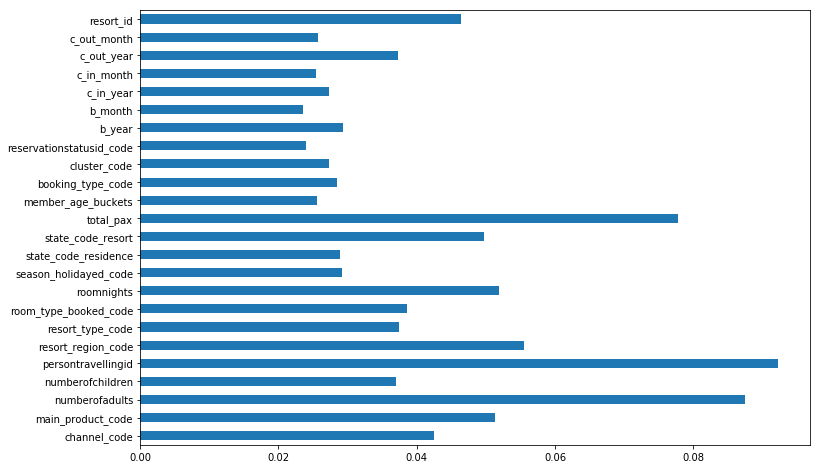

In [35]:
## Feature Importance
importances=pd.Series(xgbr2.feature_importances_, index=X.columns) 
importances.plot(kind='barh', figsize=(12,8))